In [1]:
import pandas as pd
import numpy as np

In [34]:
df= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [37]:
df.isnull().sum()
df.dropna(inplace=True)
print(df.isna())
print(df.isna().sum()) 

       Unnamed: 0  Clothing ID    Age  Title  Review Text  Rating  \
2           False        False  False  False        False   False   
3           False        False  False  False        False   False   
4           False        False  False  False        False   False   
5           False        False  False  False        False   False   
6           False        False  False  False        False   False   
...           ...          ...    ...    ...          ...     ...   
23481       False        False  False  False        False   False   
23482       False        False  False  False        False   False   
23483       False        False  False  False        False   False   
23484       False        False  False  False        False   False   
23485       False        False  False  False        False   False   

       Recommended IND  Positive Feedback Count  Division Name  \
2                False                    False          False   
3                False                 

In [38]:
df.nunique().sum

<bound method Series.sum of Unnamed: 0                 19662
Clothing ID                 1095
Age                           77
Title                      13983
Review Text                19656
Rating                         5
Recommended IND                2
Positive Feedback Count       79
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64>

In [39]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nNombre de valeurs uniques dans {col}:")
    print(df[col].nunique())
    print(f"\nAperçu des valeurs dans {col}:")
    print(df[col].value_counts().head())


Nombre de valeurs uniques dans Title:
13983

Aperçu des valeurs dans Title:
Title
Love it!      136
Beautiful      95
Love           88
Love!          83
Beautiful!     72
Name: count, dtype: int64

Nombre de valeurs uniques dans Review Text:
19656

Aperçu des valeurs dans Review Text:
Review Text
Perfect fit and i've gotten so many compliments. i buy all my suits from here now!                                                                                                                                                                                                                                                                                                                                                                                                                                        3
Lightweight, soft cotton top and shorts. i think it's meant to be a beach cover-up but i'm wearing it as a thin, light-weight summer outfit on these hot hot days. the top has a loose elastic a

In [ ]:
# df_filtered = df[df['Rating'] > 3]
# print("Dimension du DataFrame après filtrage :", df_filtered.shape)

Dimension du DataFrame après filtrage : (15147, 11)


Label Encoding pour Division Name


Label encoding: used to encode categorical features into numeric values ​​(e.g. department name).

In [ ]:
import numpy as np

categories_uniques = df['Division Name'].unique()

mapping_division = {category: idx for idx, category in enumerate(categories_uniques, start=1)}
mapping_division[np.nan] = 0

df.loc[:, 'division_encoded'] = df['Division Name'].map(mapping_division)

occurrences = df['division_encoded'].value_counts()
print("Occurrences de chaque catégorie après l’encodage :\n", occurrences)
print(df)

Occurrences de chaque catégorie après l’encodage :
 division_encoded
1    11664
2     6778
3     1220
Name: count, dtype: int64
       Unnamed: 0  Clothing ID  Age  \
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
5               5         1080   49   
6               6          858   39   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                                        

Ordinal Encoding pour Department Name

Codage ordinal : adapté aux variables avec des données ordinales (par exemple, le nom du département).

In [ ]:
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='value')
df.loc[:, 'department_encoded_ordinal'] = encoder.fit_transform(df[['Department Name']])

distribution = df['department_encoded_ordinal'].value_counts()
print("La distribution des valeurs encodées:\n", distribution)
print(df)

La distribution des valeurs encodées:
 department_encoded_ordinal
3    8713
1    5371
2    3184
4    1408
5     879
6     107
Name: count, dtype: int64
       Unnamed: 0  Clothing ID  Age  \
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
5               5         1080   49   
6               6          858   39   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
5                                Not for the very petite   
6                                   Cagrcoal shimmer fun   
...                

 One-Hot Encoding pour Class Name

Codage One-Hot : utilisé pour créer des colonnes binaires pour chaque catégorie (par exemple, le nom de la classe).

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' для избежания дамми-ловушки

class_encoded = encoder.fit_transform(df[['Class Name']])
class_encoded_df = pd.DataFrame(class_encoded, columns=encoder.get_feature_names_out(['Class Name']))

df = pd.concat([df, class_encoded_df], axis=1)

zero_percentage = (class_encoded_df == 0).mean() * 100
print("Pourcentage de zéros dans chaque colonne encodée :\n", zero_percentage)

Pourcentage de zéros dans chaque colonne encodée :
 Class Name_Casual bottoms    99.994914
Class Name_Chemises          99.994914
Class Name_Dresses           72.683349
Class Name_Fine gauge        95.285322
Class Name_Intimates         99.389686
Class Name_Jackets           96.958600
Class Name_Jeans             95.066626
Class Name_Knits             79.752823
Class Name_Layering          99.415115
Class Name_Legwear           99.333740
Class Name_Lounge            97.080663
Class Name_Outerwear         98.570847
Class Name_Pants             94.115553
Class Name_Shorts            98.677652
Class Name_Skirts            95.951582
Class Name_Sleep             99.115044
Class Name_Sweaters          93.805310
Class Name_Swim              98.509816
Class Name_Trend             99.455803
dtype: float64


Un pourcentage élevé de zéros (par exemple 99,993398 pour Class Name_Casual bottoms) signifie que cette classe apparaît très rarement dans les données.

Un faible pourcentage de zéros (par exemple, 73,295042 pour Class Name_Dresses) indique que cette classe se produit plus fréquemment.

Cela peut être utile pour analyser le déséquilibre des classes ou pour comprendre la distribution des données.

OneHotEncoder pour Recommended IND

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df['Recommended IND'] = df['Recommended IND']

# Применяем OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' для избежания дамми-ловушки
recommended_encoded = encoder.fit_transform(df[['Recommended IND']])

recommended_encoded_df = pd.DataFrame(recommended_encoded, columns=encoder.get_feature_names_out(['Recommended IND']))

df = pd.concat([df, recommended_encoded_df], axis=1)

print("Les premières lignes du DataFrame encodé:\n", recommended_encoded_df.head())

Les premières lignes du DataFrame encodé:
    Recommended IND_1.0  Recommended IND_nan
0                  0.0                  0.0
1                  1.0                  0.0
2                  1.0                  0.0
3                  0.0                  0.0
4                  1.0                  0.0


In [44]:
df.to_csv('./Womens_Clothing_E-Commerce_Reviews_Processed.csv', index=False)

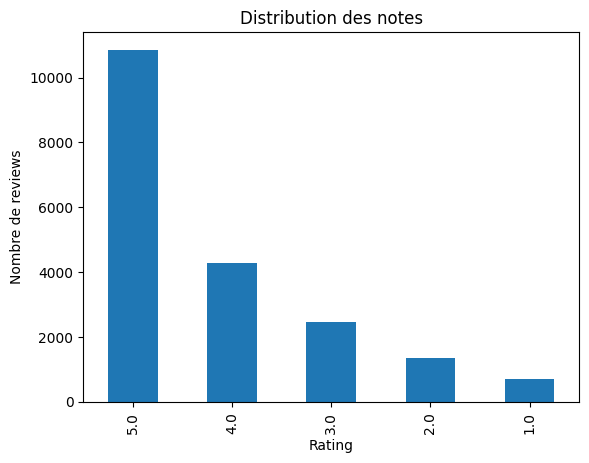

In [ ]:
import matplotlib.pyplot as plt

df['Rating'].value_counts().plot(kind='bar')
plt.title('Distribution des notes')
plt.xlabel('Rating')
plt.ylabel('Nombre de reviews')
plt.show()

Classification (prédiction de l’IND recommandé) |
Préparation des données | 
Après l'encodage, vous disposez d'un DataFrame (df_filtered) où :

Fonctionnalités : Colonnes codées (division_encoded, department_encoded_ordinal, Class Name_*, etc.).

Variable cible : IND recommandé.

In [47]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Clothing ID   Age                    Title  \
2             2.0       1077.0  60.0  Some major design flaws   
3             3.0       1049.0  50.0         My favorite buy!   
4             4.0        847.0  47.0         Flattering shirt   
5             5.0       1080.0  49.0  Not for the very petite   
6             6.0        858.0  39.0     Cagrcoal shimmer fun   
...           ...          ...   ...                      ...   
22828         NaN          NaN   NaN                      NaN   
22829         NaN          NaN   NaN                      NaN   
22830         NaN          NaN   NaN                      NaN   
22847         NaN          NaN   NaN                      NaN   
22854         NaN          NaN   NaN                      NaN   

                                             Review Text  Rating  \
2      I had such high hopes for this dress and reall...     3.0   
3      I love, love, love this jumpsuit. it's fun

Convertir du texte au format numérique

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
df_filtered = df.dropna(subset=['Review Text', 'Recommended IND'])

print("types de donnees dans df_filtered:")
print(df_filtered.dtypes)

# Créer une variable cible
y = df_filtered['Recommended IND'].reset_index(drop=True)

X_other = df_filtered.drop(columns=['Review Text', 'Recommended IND']).reset_index(drop=True)

numeric_columns = X_other.select_dtypes(include=['int64', 'float64']).columns
X_other_numeric = X_other[numeric_columns]

print(f"Colonnes numériques dans X_other: {numeric_columns.tolist()}")
print(f"Shape X_other_numeric: {X_other_numeric.shape}")

# Appliquer la vectorisation aux données texte
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df_filtered['Review Text'])
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())
print(f"Размер X_text_df: {X_text_df.shape}")

# Combiner uniquement des caractéristiques numériques et du texte vectorisé
X = pd.concat([X_other_numeric, X_text_df], axis=1)
print(f"Taille X: {X.shape}, Taille y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

types de donnees dans df_filtered:
Unnamed: 0                    float64
Clothing ID                   float64
Age                           float64
Title                          object
Review Text                    object
Rating                        float64
Recommended IND               float64
Positive Feedback Count       float64
Division Name                  object
Department Name                object
Class Name                     object
division_encoded              float64
department_encoded_ordinal    float64
Class Name_Casual bottoms     float64
Class Name_Chemises           float64
Class Name_Dresses            float64
Class Name_Fine gauge         float64
Class Name_Intimates          float64
Class Name_Jackets            float64
Class Name_Jeans              float64
Class Name_Knits              float64
Class Name_Layering           float64
Class Name_Legwear            float64
Class Name_Lounge             float64
Class Name_Outerwear          float64
Class Name_Pant

In [ ]:
# Amélioration du modèle en ajustant les hyperparamètres
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search.best_params_}")
print(f"Meilleure précision: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Précision sur l'échantillon de test: {accuracy_score(y_test, y_pred)}")

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Meilleure précision: 0.9374405129485343
Précision sur l'échantillon de test: 0.9519450800915332


Erreur quadratique moyenne: 0.0
R²: 1.0


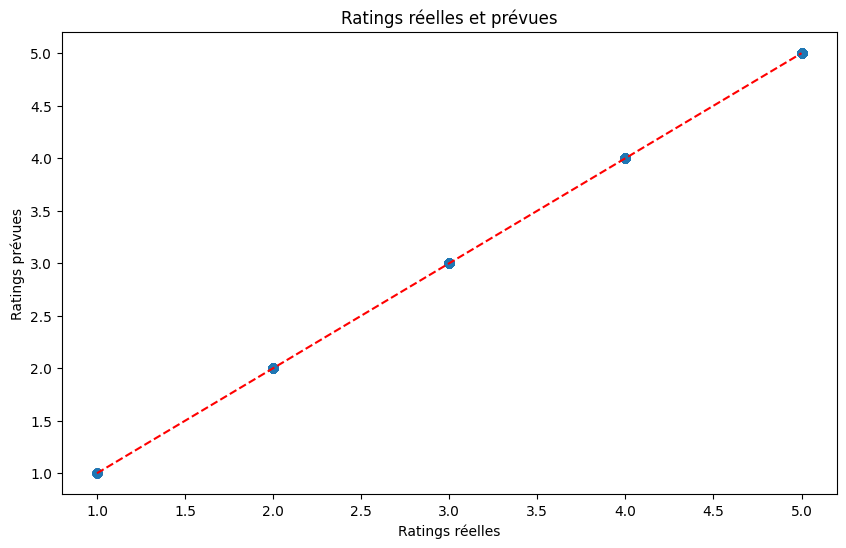

In [ ]:
# 2. Регрессия: Предсказание Rating
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_regression = X
y_regression = df_filtered['Rating'].reset_index(drop=True)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

y_pred_reg = reg_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"Erreur quadratique moyenne: {mse}")
print(f"R²: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.title('Ratings réelles et prévues')
plt.xlabel('Ratings réelles')
plt.ylabel('Ratings prévues')
plt.show()

In [ ]:
errors = y_test_reg - y_pred_reg
plt.hist(errors, bins=30)
plt.title("Распределение ошибок")
plt.show()

Количество пропущенных значений в X_cluster:
Unnamed: 0                 0
Clothing ID                0
Age                        0
Rating                     0
Positive Feedback Count    0
                          ..
yet                        0
you                        0
your                       0
zip                        0
zipper                     0
Length: 1091, dtype: int64
Размер X_cluster после заполнения пропущенных значений: (16462, 1091)


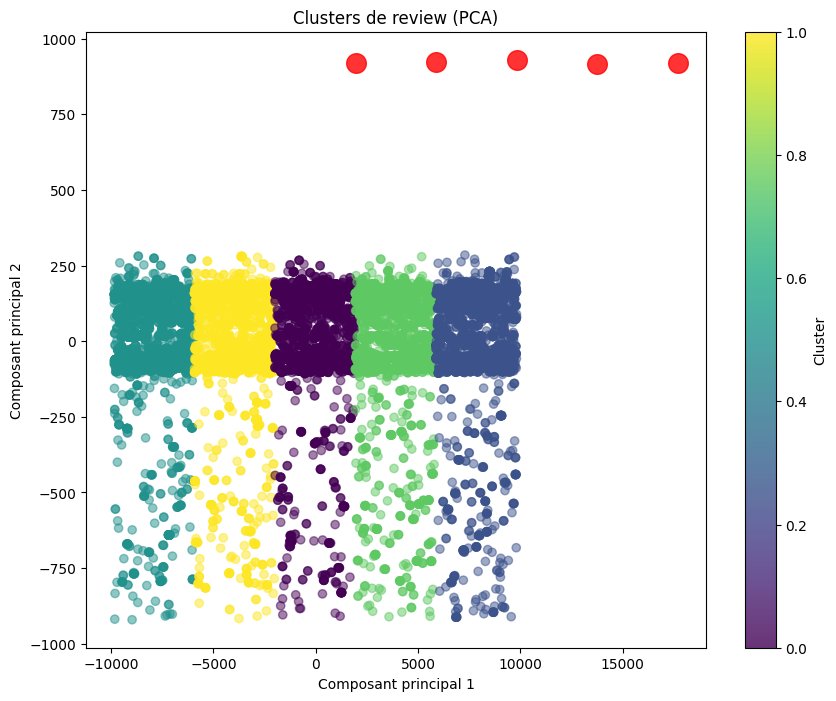

Classement moyen par clusters:
Cluster
0    4.185275
1    4.153382
2    4.166872
3    4.211790
4    4.211492
Name: Rating, dtype: float64
Cluster 0, top mots: ['the', 'it', 'and', 'is', 'this', 'to', 'in', 'but', 'dress', 'on']
Cluster 1, top mots: ['the', 'it', 'and', 'is', 'to', 'this', 'in', 'on', 'but', 'for']
Cluster 2, top mots: ['the', 'it', 'and', 'is', 'to', 'this', 'in', 'on', 'but', 'for']
Cluster 3, top mots: ['the', 'it', 'and', 'is', 'to', 'this', 'in', 'but', 'dress', 'on']
Cluster 4, top mots: ['the', 'it', 'and', 'is', 'this', 'to', 'in', 'but', 'dress', 'on']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X_cluster = X


print("Количество пропущенных значений в X_cluster:")
print(X_cluster.isnull().sum())

X_cluster = X_cluster.fillna(0)

print(f"Размер X_cluster после заполнения пропущенных значений: {X_cluster.shape}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.8)
plt.title('Clusters de review (PCA)')
plt.xlabel('Composant principal 1')
plt.ylabel('Composant principal 2')
plt.colorbar(label='Cluster')
plt.show()

cluster_df = pd.DataFrame(df_filtered['Review Text'].reset_index(drop=True))
cluster_df['Cluster'] = clusters
cluster_df['Rating'] = df_filtered['Rating'].reset_index(drop=True)

cluster_ratings = cluster_df.groupby('Cluster')['Rating'].mean()
print("Classement moyen par clusters:")
print(cluster_ratings)

def get_top_words(cluster_num, n_words=10):
    cluster_indices = cluster_df[cluster_df['Cluster'] == cluster_num].index
    cluster_tfidf = X_text_df.iloc[cluster_indices]
    avg_tfidf = cluster_tfidf.mean(axis=0)
    top_indices = avg_tfidf.argsort()[-n_words:][::-1]
    return X_text_df.columns[top_indices].tolist()

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}, top mots: {get_top_words(i)}")

In [ ]:
#cluster validation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

data = pd.read_csv("your_data.csv")  # Укажи свой файл

# 1. Проверка на выбросы (метод IQR)
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

print("Выбросы в данных:")
print(detect_outliers(data))

# 2. Нормализация данных
data_scaled = data.apply(zscore)

# 3. PCA анализ
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
print("Объясненная дисперсия PCA:", explained_variance)

# Проверка выбросов в PCA
plt.figure(figsize=(8, 5))
sns.boxplot(data=pd.DataFrame(pca_result, columns=['PC1', 'PC2']))
plt.title("Проверка выбросов в PCA-компонентах")
plt.show()

# 4. Определение оптимального количества кластеров
silhouette_scores = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_result)
    silhouette_scores.append(silhouette_score(pca_result, labels))

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.title('Оптимальное количество кластеров')
plt.show()

# 5. Проверка распределения точек по кластерам
optimal_k = np.argmax(silhouette_scores) + 2  # +2, так как range(2,10)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_result)

cluster_counts = pd.Series(clusters).value_counts()
print("Распределение точек по кластерам:")
print(cluster_counts)

# 6. Визуализация кластеров
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Центры кластеров')
plt.xlabel("Компонент 1")
plt.ylabel("Компонент 2")
plt.title("Кластеры после PCA")
plt.legend()
plt.show()


C:\Users\mynam\AppData\Local\Temp\ipykernel_24164\3014667260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)


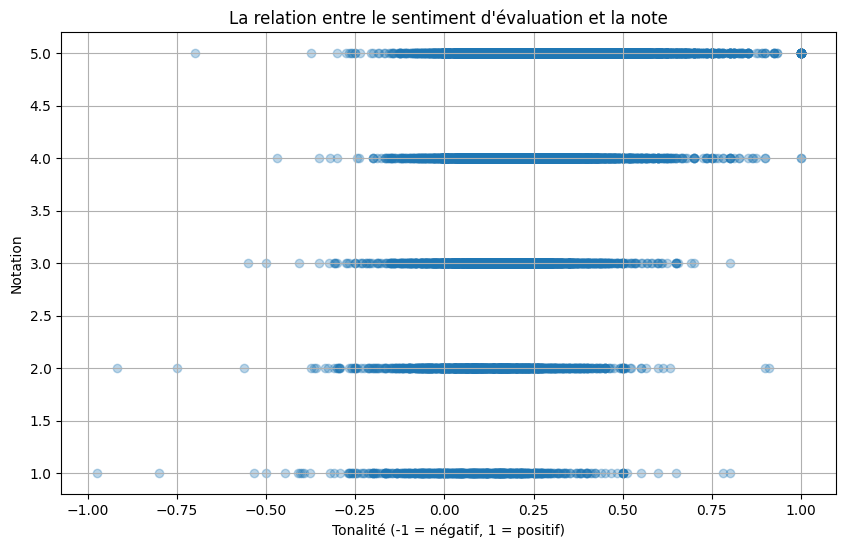

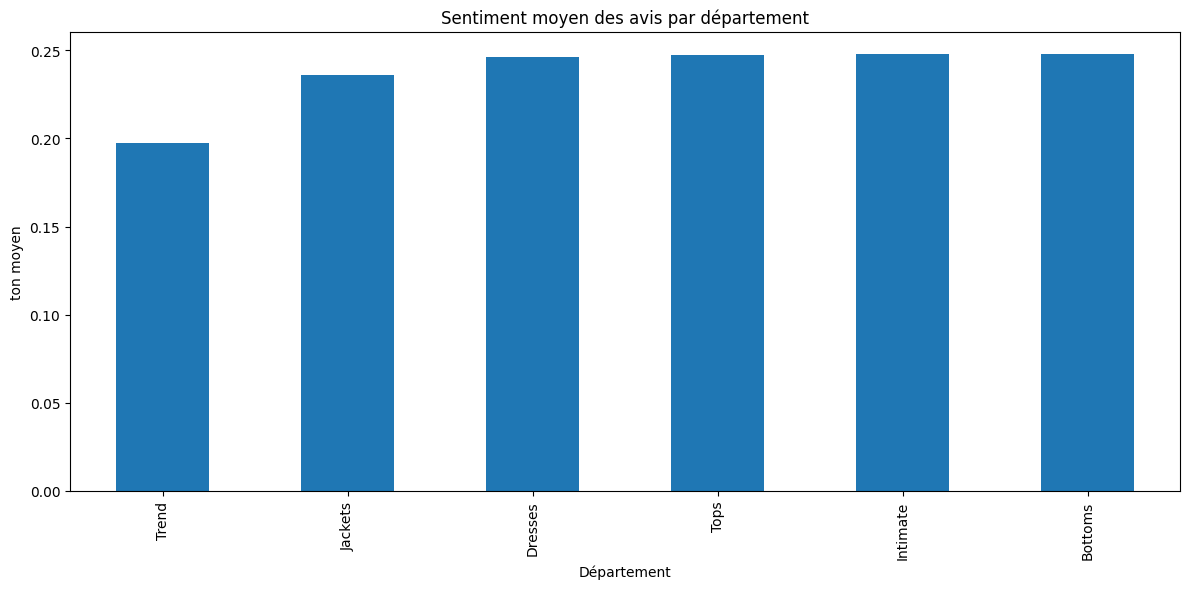

In [128]:
# 4. Анализ тональности отзывов
from textblob import TextBlob

# Добавляем столбец с тональностью
df_filtered['Sentiment'] = df_filtered['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Анализируем связь между тональностью и рейтингом
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Sentiment'], df_filtered['Rating'], alpha=0.3)
plt.title("La relation entre le sentiment d'évaluation et la note")
plt.xlabel('Tonalité (-1 = négatif, 1 = positif)')
plt.ylabel('Notation')
plt.grid(True)
plt.show()

# Средняя тональность по отделам
sentiment_by_dept = df_filtered.groupby('Department Name')['Sentiment'].mean().sort_values()
plt.figure(figsize=(12, 6))
sentiment_by_dept.plot(kind='bar')
plt.title('Sentiment moyen des avis par département')
plt.xlabel('Département')
plt.ylabel('ton moyen')
plt.tight_layout()
plt.show()

In [ ]:
# 5. Создание интерактивного приложения для анализа отзывов
import joblib

# Сохранение моделей
joblib.dump(model, 'models/recommendation_model.pkl')
joblib.dump(reg_model, 'models/rating_model.pkl')
joblib.dump(tfidf, 'models/tfidf_vectorizer.pkl')

def predict_recommendation(review_text, age, rating):
    loaded_model = joblib.load('models/recommendation_model.pkl')
    loaded_tfidf = joblib.load('models/tfidf_vectorizer.pkl')
    
    text_features = loaded_tfidf.transform([review_text])
    text_df = pd.DataFrame(text_features.toarray(), columns=loaded_tfidf.get_feature_names_out())
    
    numeric_data = pd.DataFrame({
        'Unnamed: 0': [0],
        'Clothing ID': [0],
        'Age': [age],
        'Rating': [rating],
        'Positive Feedback Count': [0]
    })
    
    full_features = pd.DataFrame(0, index=[0], columns=X.columns)
    

    for col in numeric_data.columns:
        if col in full_features.columns:
            full_features[col] = numeric_data[col].values
    

    for col in text_df.columns:
        if col in full_features.columns:
            full_features[col] = text_df[col].values
    
    prediction = loaded_model.predict(full_features)
    probability = loaded_model.predict_proba(full_features)
    
    return {
        'recommendation': 'Recommandé' if prediction[0] == 1 else 'Non Recommandé',
        'confidence': probability[0][1] if prediction[0] == 1 else probability[0][0]
    }

In [ ]:
# 7. Тематическое моделирование
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
df_filtered = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(df_filtered)
count_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_counts = count_vectorizer.fit_transform(df_filtered['Review Text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Тема #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

feature_names = count_vectorizer.get_feature_names_out()
print_top_words(lda, feature_names)

topic_results = lda.transform(X_counts)
df_filtered['dominant_topic'] = topic_results.argmax(axis=1)

topic_distribution = df_filtered['dominant_topic'].value_counts()
print("Распределение тем:")
print(topic_distribution)

plt.figure(figsize=(12, 8))
pd.crosstab(df_filtered['Department Name'], df_filtered['dominant_topic']).plot(kind='bar', stacked=True)
plt.title('Répartition des sujets par départements')
plt.xlabel('Départements')
plt.ylabel("Nombre d'avis")
plt.legend(title='Theme')
plt.tight_layout()
plt.show()

       Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of c

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [133]:
tfidf = TfidfVectorizer(max_features=5000)
df_filtered['Review Length'] = df_filtered['Review Text'].apply(len)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Users\mynam\AppData\Local\Temp\ipykernel_24164\3318412850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Review Length'] = df_filtered['Review Text'].apply(len)


{'max_depth': None, 'n_estimators': 200}


Analyse de Colonnes

In [134]:
# 1. Analyse des valeurs des variables cibles
print("Distribution de la variable cible (IND recommandée) :")
print(df['Recommended IND'].value_counts())
print("\nValeurs uniques de la variable cible :")
print(df['Recommended IND'].unique())


Distribution de la variable cible (IND recommandée) :
Recommended IND
1.0    13476
0.0     2986
Name: count, dtype: int64

Valeurs uniques de la variable cible :
[ 0.  1. nan]


In [ ]:
# 2. Анализ текстов отзывов
print("\nStatistiques sur la longueur du texte de révision :")
df['Review Length'] = df['Review Text'].str.len()
print(df['Review Length'].describe())

print("\nAvis potentiellement problématiques:")
print("Nombre d'avis vides :", df[df['Review Text'].str.strip() == ''].shape[0])
print("Nombre d'avis très courts (<10 caractères) :", df[df['Review Length'] < 10].shape[0])


Statistiques sur la longueur du texte de révision :
count    16462.000000
mean       318.319827
std        142.297109
min          9.000000
25%        199.000000
50%        315.000000
75%        475.000000
max        508.000000
Name: Review Length, dtype: float64

Avis potentiellement problématiques:
Nombre d'avis vides : 0
Nombre d'avis très courts (<10 caractères) : 1


In [136]:
# 4. Анализ категориальных признаков
print("\nSignifications les plus courantes Division Name:")
print(df['Division Name'].value_counts().head())
print("\nProblèmes avec Division Name:")
print("Nombre de valeurs manquantes :", df['Division Name'].isnull().sum())

print("\nSignifications les plus courantes Department Name:")
print(df['Department Name'].value_counts().head())
print("\nProblèmes avec Department Name:")
print("Nombre de valeurs manquantes :", df['Department Name'].isnull().sum())

print("\nSignifications les plus courantes Class Name:")
print(df['Class Name'].value_counts().head())
print("\nProblèmes avec Class Name:")
print("Nombre de valeurs manquantes :", df['Class Name'].isnull().sum())


Significations les plus courantes Division Name:
Division Name
General           9885
General Petite    5575
Initmates         1002
Name: count, dtype: int64

Problèmes avec Division Name:
Nombre de valeurs manquantes : 3116

Significations les plus courantes Department Name:
Department Name
Tops        7329
Dresses     4514
Bottoms     2610
Intimate    1158
Jackets      758
Name: count, dtype: int64

Problèmes avec Department Name:
Nombre de valeurs manquantes : 3116

Significations les plus courantes Class Name:
Class Name
Dresses     4514
Knits       3234
Blouses     2235
Sweaters    1085
Pants        957
Name: count, dtype: int64

Problèmes avec Class Name:
Nombre de valeurs manquantes : 3116


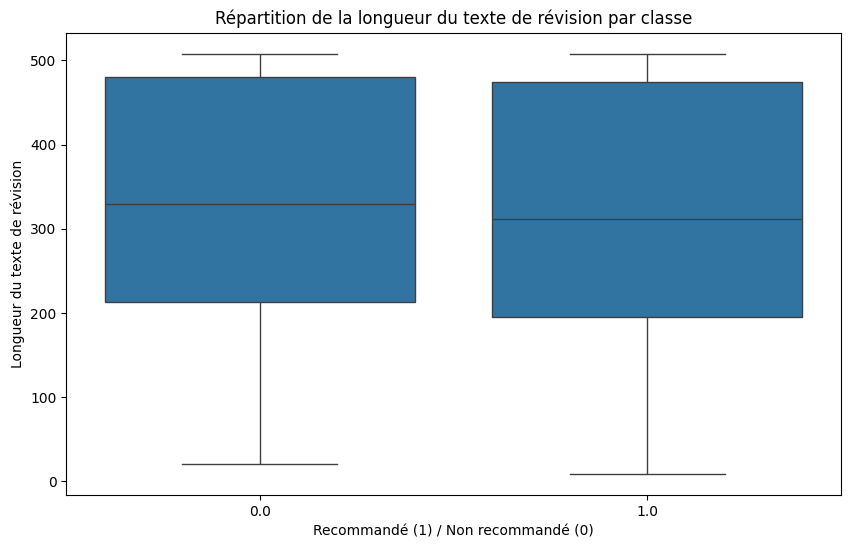

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Визуализация распределения длины текста по классам
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recommended IND', y='Review Length', data=df)
plt.title('Répartition de la longueur du texte de révision par classe')
plt.xlabel('Recommandé (1) / Non recommandé (0)')
plt.ylabel('Longueur du texte de révision')
plt.show()

Сomparaison de modèles

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('./Womens Clothing E-Commerce Reviews.csv')

df_filtered = df.dropna(subset=['Review Text', 'Recommended IND', 'Age', 'Positive Feedback Count'])

X = df_filtered.drop(columns=['Recommended IND'])
y = df_filtered['Recommended IND']  

print(f"Размер X: {X.shape}, Размер y: {y.shape}")

tfidf = TfidfVectorizer(max_features=5000)
X_text = tfidf.fit_transform(X['Review Text'])
X_text_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())

df_filtered['Review Length'] = df_filtered['Review Text'].apply(len)
X = pd.concat([X.drop(columns=['Review Text']), X_text_df, df_filtered['Review Length']], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель 1: Random Forest
print("Обучение Random Forest...")
rf_model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Лучшие параметры для Random Forest:", grid_search.best_params_)
rf_model = grid_search.best_estimator_

# Модель 2: Logistic Regression
print("\nОбучение Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Модель 3: XGBoost
print("\nОбучение XGBoost...")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Модель 4: Support Vector Machine (SVM)
print("\nОбучение SVM...")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nРезультаты для {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")
evaluate_model(svm_model, X_test, y_test, "SVM")

Размер X: (22641, 10), Размер y: (22641,)


C:\Users\mynam\AppData\Local\Temp\ipykernel_24164\1035991761.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Review Length'] = df_filtered['Review Text'].apply(len)


ValueError: Found input variables with inconsistent numbers of samples: [23463, 22641]